**Chapter 3 – Classification - Based on this chapter**

_This notebook contains an excerpt of the sample code and solutions to the exercises in chapter 3._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.7 or above:

In [47]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [48]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Let's define the default font sizes to make the figures prettier:

In [49]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# MNIST

Load the MNIST dataset

In [50]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


How to get the description of the dataset

In [51]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

How to get information about the structure of the data set

In [52]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Assign learning data to X and labels to y

In [53]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Extract information about the data

In [54]:
X.shape

(70000, 784)

In [55]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [56]:
y.shape

(70000,)

In [57]:
28 * 28

784

Demoing the bitmap structure

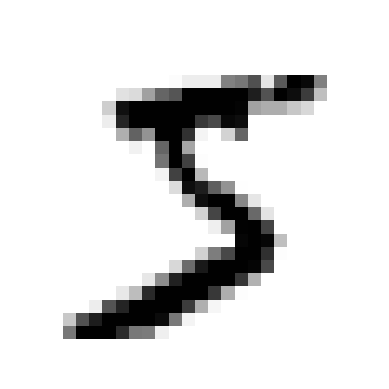

In [58]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)

plt.show()

In [59]:
y[0]

'5'

Extracting training and test sets

In [60]:
#X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = X[:10000], X[68000:], y[:10000], y[68000:] #For better execution time

# Training a Binary Classifier

###Excercise(s):

1. Evaluate the 'shapes' of 'X_train', 'X_test', 'y_train' and 'y_test' by making code cells as below.

In [61]:
##Start with this one
X_train.shape


(10000, 784)

2. What does that tell us?

###Extracting binary labels - true or false

In [62]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

###Excercise(s):

1. Evaluate 'y_train_5' and 'y_test_5' in code cells as done below

In [63]:
y_train_5

array([ True, False, False, ..., False, False, False])

2. Explain the results

#Applying a classifier


 In this case a SGDClassifier and we let it learn from training data with the fit method

In [64]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Let it predict 'some_digit' in this case a '5'

In [65]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## Confusion Matrix

Establish the confusion matrix for the training data

In [66]:
y_train_pred = sgd_clf.predict(X_train)

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[8846,  291],
       [  46,  817]])

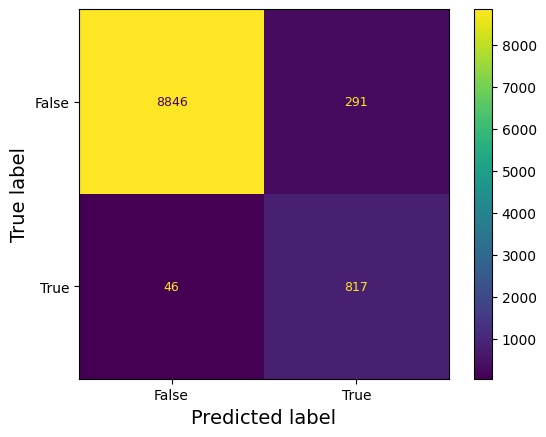

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)
plt.show()

###Excercise(s)

1. Establish the confusion matrix on the **test set** in some code cells below

In [69]:
##Start with this
y_test_pred = sgd_clf.predict(X_test)

Establish the confusion matrix with perfect predictions

In [70]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[9137,    0],
       [   0,  863]])

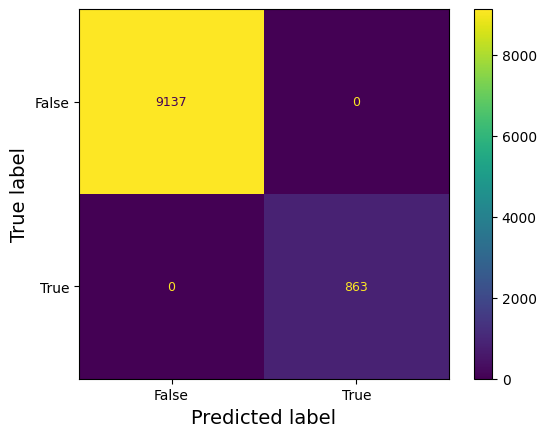

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_perfect_predictions)
plt.show()

## Accuracy, Precision and Recall

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score



Evaluate accuracy

In [73]:
accuracy_score(y_train_5, y_train_pred) ## (TP+TN)/(TP+FP+TN+FN)

0.9663

Evaluate precission

In [74]:
precision_score(y_train_5, y_train_pred)

0.7373646209386282

Evaluate recall

In [75]:
recall_score(y_train_5, y_train_pred)

0.9466975666280417

###Excercises

1. Explain the 3 scores accuracy, precision and recall in the current context

2. Establish evaluation of these scores for our **test data set** in code cells below

3. Does our digit recognition solution perform better or worse on test data compared to training data?

4. What does that mean?

###Questions

1. What is a binary classifier?
    

2. Why is the data set split into training and test sets?
    

3. What is a confusion matrix?
    

4. Explain the values (TP, TN, FP, FN) in your confusion matrix?